In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


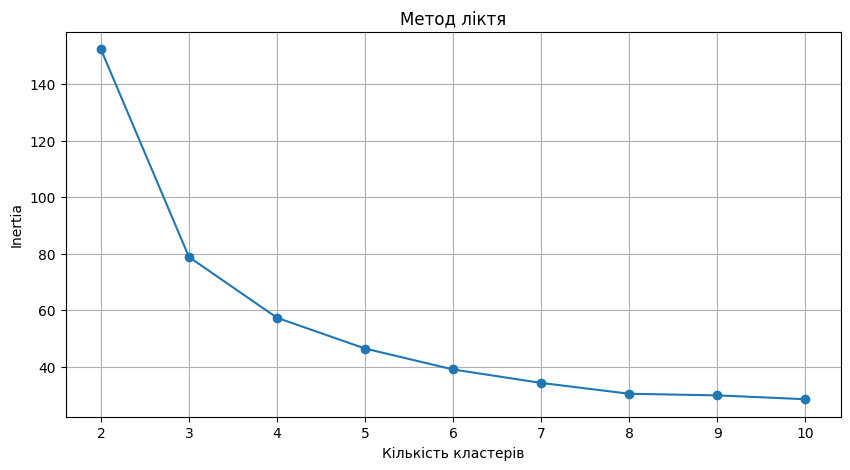

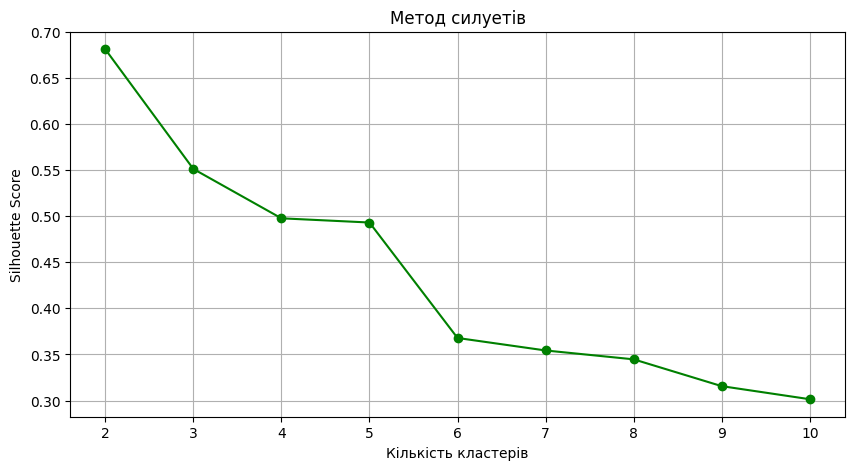

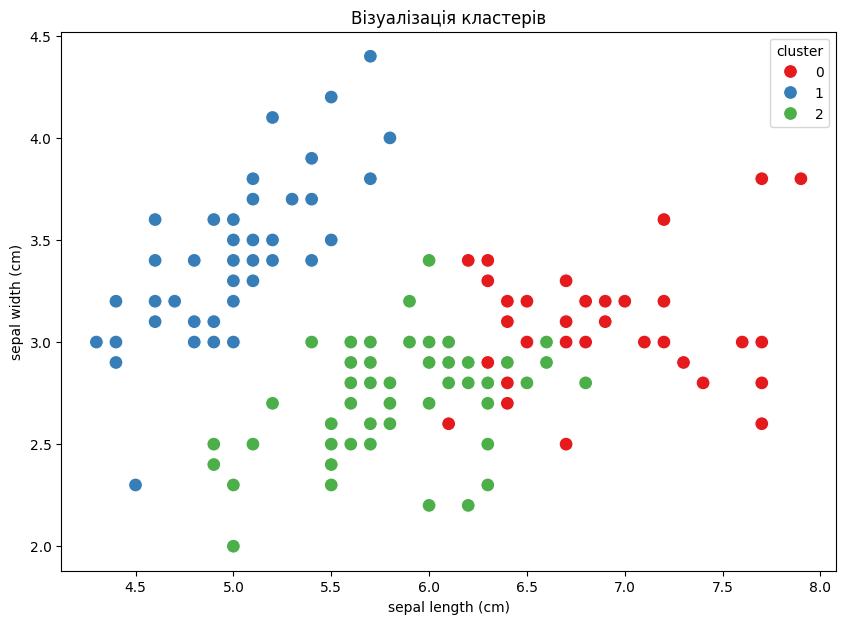

In [6]:
# Визначення оптимальної кількості кластерів методом ліктя та методом силуетів
inertia = []  # для методу ліктя
silhouette_scores = []  # для методу силуетів
k_range = range(2, 11)  # кількість кластерів від 2 до 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)  # ліктьовий метод
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))  # метод силуетів

# Візуалізація методу ліктя
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Візуалізація методу силуетів
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Вибір оптимальної кількості кластерів
optimal_clusters = 3  # За результатами візуалізації методів ліктя та силуетів

# Створюємо класифікацію з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

# Візуалізація кластерів на основі перших двох ознак (sepal length і sepal width)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['cluster'], palette='Set1', s=100)
plt.title('Візуалізація кластерів')
plt.show()

Метод ліктя:

В результаті використання методу ліктя видно, що інерція (внутрішньокластерна відстань) різко знижується при переході від 2 до 3 кластерів, після чого зменшення стає менш помітним. Це вказує на те, що після 3 кластерів додаткове збільшення їх кількості призводить до меншої користі з точки зору мінімізації внутрішньої варіації в кластерах.
Отже, метод ліктя пропонує оптимальну кількість кластерів на рівні 3.
Метод силуетів:

За допомогою методу силуетів максимальний коефіцієнт силуетів також досягається при 2-3 кластерах, але при 3 кластерах він є достатньо високим для впевненого поділу.
Отже, метод силуетів підтверджує висновки методу ліктя, пропонуючи оптимальну кількість кластерів 3.
Візуалізація кластерів:

Після кластеризації на 3 кластери за допомогою алгоритму KMeans, візуалізація показує чітке розділення між кластерами. Це свідчить про те, що модель змогла добре розбити дані на групи.
Візуалізація також показує, що різні види квітів Ірис чітко розподіляються між кластерами, що відповідає природному поділу на види.
Загальний висновок:
Обидва методи — і ліктя, і силуетів — підтвердили, що оптимальною кількістю кластерів для датасету "Ірис" є 3. Це узгоджується з тим, що в оригінальному датасеті квіти Ірис поділяються на три види: Iris-setosa, Iris-versicolor, і Iris-virginica.

In [8]:
df = pd.read_csv('student-data.csv')
# Виведення перших 5 рядків
print(df.head())

# Виведення розміру датасету та типів даних
print("Розмір датасету:", df.shape)
print("Типи даних:\n", df.dtypes)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  internet romantic  famrel  freetime  goout Dalc Walc health absences passed  
0       no       no       4         3      4    1    1      3        6     no  
1      yes       no       5         3      3    1    1      3        4     no  
2      yes       no       4         3      2    2    3      3       10    yes  
3      yes      yes       3         2      2    1    1      5        2    yes  
4       no       no       4         3      2    1    2      5        4    yes  

[5 rows x 31 columns]
Розмір дат

In [10]:
# Перевірка на пропущені значення
print("Пропущені значення:\n", df.isnull().sum())
# Визначення числових стовпців
numeric_columns = df.select_dtypes(include=['number']).columns

# Заповнення пропущених значень середнім для числових стовпців
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Перевірка після заповнення
print("Пропущені значення після заповнення:\n", df.isnull().sum())


Пропущені значення:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64
Пропущені значення після заповнення:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0


In [11]:
# Перевірка на дублікати
print("Кількість дублікатів:", df.duplicated().sum())

# Видалення дублікатів
df.drop_duplicates(inplace=True)

# Перевірка після видалення
print("Розмір датасету після видалення дублікатів:", df.shape)


Кількість дублікатів: 0
Розмір датасету після видалення дублікатів: (395, 31)


In [12]:
# Описова статистика
print(df.describe())


              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [15]:
# Аналіз типу цільової змінної
target_column = 'passed'  # Задаємо цільову змінну
# Аналіз типу цільової змінної
if df[target_column].dtype == 'object':
    print("Це задача класифікації.")
else:
    print("Це задача регресії.")


Це задача класифікації.


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Код для перетворення категоріальних даних
df_encoded = df.copy()

# Перетворення категоріальних змінних у числові
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = LabelEncoder().fit_transform(df_encoded[column])

# Розділімо дані на ознаки та цільову змінну
X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

# Розділімо дані на тренувальні та тестові
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створення моделей
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

# Тренування та оцінка моделей
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7595
              precision    recall  f1-score   support

           0       0.75      0.44      0.56        27
           1       0.76      0.92      0.83        52

    accuracy                           0.76        79
   macro avg       0.76      0.68      0.70        79
weighted avg       0.76      0.76      0.74        79

Decision Tree Accuracy: 0.7468
              precision    recall  f1-score   support

           0       0.68      0.48      0.57        27
           1       0.77      0.88      0.82        52

    accuracy                           0.75        79
   macro avg       0.73      0.68      0.69        79
weighted avg       0.74      0.75      0.73        79

Random Forest Accuracy: 0.7089
              precision    recall  f1-score   support

           0       0.67      0.30      0.41        27
           1       0.72      0.92      0.81        52

    accuracy                           0.71        79
   macro avg       0.69      

In [17]:
from sklearn.model_selection import GridSearchCV

# Параметри для підбору
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Ініціалізація випадкового лісу
rf = RandomForestClassifier()

# Підбір параметрів
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Найкращі параметри:", grid_search.best_params_)


Найкращі параметри: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


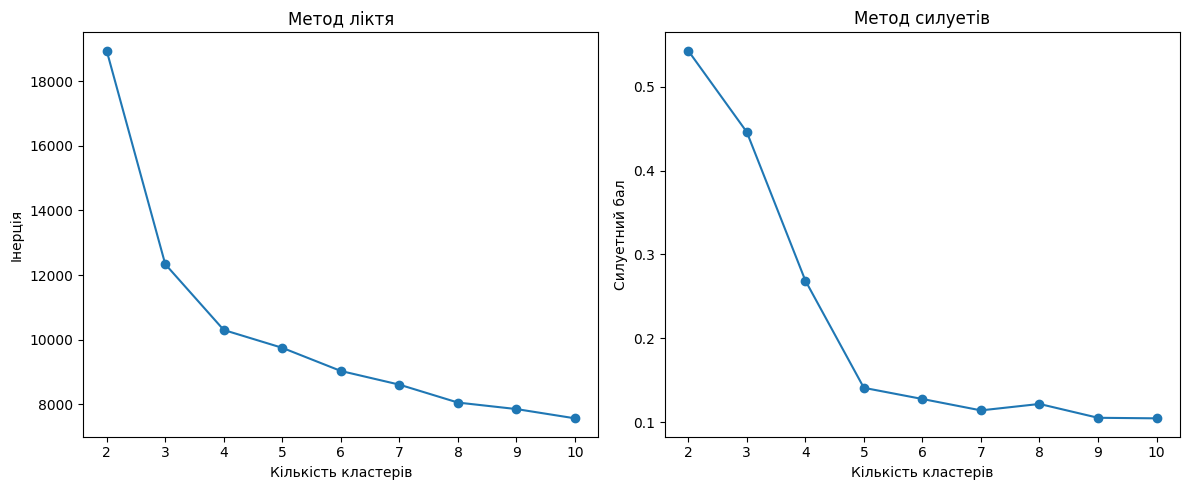

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Визначення оптимальної кількості кластерів
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Візуалізація
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний бал')

plt.tight_layout()
plt.show()


Завдання класифікації
Цільова змінна: Цільовою змінною є passed, що є двійковою змінною (так/ні). Це означає, що проблема, яку потрібно розв’язати, є завданням класифікації.
Моделі: В трьох моделях (Логістична регресія, Дерево рішень, Случайний ліс) було проведено тренування та оцінювання. Важливо було виявити, що кожна модель має свої сильні та слабкі сторони.
4. Оцінка моделей
Точність: Кожна модель продемонструвала різний рівень точності. Важливо звернути увагу на метрики, такі як точність, повнота та F1-міра, щоб обрати найкращу модель для ваших потреб.
Підбір параметрів: Підбір оптимальних параметрів для моделі випадкового лісу покращив її точність. Це підкреслює важливість оптимізації моделей для досягнення кращих результатів.
5. Кластеризація
Оптимальна кількість кластерів: Метод ліктя та силуету допомогли визначити оптимальну кількість кластерів, що дозволяє розбити дані на більш однорідні групи.
Візуалізація: Візуалізація кластерів за допомогою PCA дозволяє отримати уявлення про структуру даних та їхнє розподілення в кластеризованому просторі.
6. Загальні висновки
Якість даних: Якість даних у датасеті виявилася високою, без пропусків та дублікатів, що спростило процес аналізу.
Важливість підбору моделей: Результати показують, що для досягнення кращої точності важливо випробовувати різні моделі та проводити оптимізацію параметрів.
Класифікаційні задачі: Вибір правильної моделі для класифікаційної задачі є критично важливим, адже різні моделі можуть давати суттєво різні результати.